In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/E-com_Data.csv')
data.shape

(541116, 12)

In [4]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


## Auto EDA

In [5]:
!pip install ydata-profiling  # '!' is used to instruct to run the command in the terminal shell

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0851ee4964e96201d50d3834d45ebccf9bba126d11a3c424ba4d751c826dbf99
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [6]:
# import the library
from ydata_profiling import ProfileReport

# create the report
profile = ProfileReport(data, title = 'Profile report')
profile.to_file(output_file = '/content/eda_ouput.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# columns used for RFM analysis grouped by Customer ID
# 1. Recency- Date of purchase
# 2. Frequency - Invoice no.
# 3. Monetary Value - Price

In [8]:
# retaining the coulumns required for analysis
data = data[['CustomerID','InvoieNo','Date of purchase','Price']]

# renaming the columns
data = data.rename(columns ={'InvoieNo':'InvoiceNo','Date of purchase':'Date'})

# data sample
data.head()


,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [9]:
round(data.isnull().mean()*100,2)


,0
CustomerID,25.30
InvoiceNo,0.58
Date,0.58
Price,0.58


In [10]:
# drop the missing value
data = data.dropna(subset = ['CustomerID'])

round(data.isnull().mean()*100,2)

,0
CustomerID,0.0
InvoiceNo,0.0
Date,0.0
Price,0.0


In [11]:
# data duplicate
data[data.duplicated()]

,CustomerID,InvoiceNo,Date,Price
7959,3670.0,375541.0,27-04-2017,804.0
12635,901.0,404814.0,03-12-2017,1395.0
13807,278.0,363157.0,14-12-2016,2028.0
18415,3482.0,400666.0,13-11-2017,566.0
24903,1346.0,382823.0,24-06-2017,2700.0
...,...,...,...,...
536824,4198.0,392192.0,25-09-2017,2316.0
536838,4043.0,399611.0,14-11-2017,518.0
537393,1234.0,392883.0,26-09-2017,2048.0
537654,3223.0,394523.0,08-10-2017,6048.0


In [12]:
print(data.duplicated().sum())
data = data.drop_duplicates(ignore_index = True)
print('Duplicate data after dropping: ',data.duplicated().sum())

1330
Duplicate data after dropping:  0


In [13]:
# data type of data
data.dtypes


,0
CustomerID,float64
InvoiceNo,float64
Date,object
Price,float64


In [16]:
# Typecasting the CustomerID
data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceNo'] = data['InvoiceNo'].astype(int)
data['Date'] = pd.to_datetime(data['Date'])

data.dtypes


,0
CustomerID,int64
InvoiceNo,int64
Date,datetime64[ns]
Price,float64


In [17]:
# latest date of purchase
data['Date'].max()

Timestamp('2017-12-19 00:00:00')

In [22]:
latest_date = dt.datetime(2017, 12, 20) # we have taken day here as 20 as we are analysing the after the last date
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [24]:
RFMscore = data.groupby('CustomerID').agg({'Date' : lambda x: (latest_date - x.max()).days, #Recency
                                            'InvoiceNo' : lambda x:x.count(),#Frequency
                                           'Price' : lambda x:x.sum() #Monetary value
                                           })
RFMscore.rename(columns = {'Date':'Recency', 'InvoiceNo':'Frequency', 'Price':'Monetary'},inplace = True)
RFMscore.head() #not a dataframe since it is not indexed

,Recency,Frequency,Monetary
CustomerID,,,
2,4,181,550416.0
3,77,27,257404.0
4,19,72,176613.0
5,311,16,41976.0
6,37,84,151822.0


In [25]:
# minimum and maximum values of each attribute
for cols in RFMscore.columns:
  print(f'For {cols} the min value is {RFMscore[cols].min()} and max value is {RFMscore[cols].max()}')

For Recency the min value is 1 and max value is 381
For Frequency the min value is 1 and max value is 7919
For Monetary the min value is -50372.0 and max value is 35472089.0


In [26]:
# Quantile of the data
quantiles = RFMscore.quantile(q = [0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [28]:
# Function for scores
# lower the value in recency more valueable the customer is
def recency_score(x,q,d):
  if x <= d[q][0.25]:
    return 1            #Highest rank
  elif x<= d[q][0.5]:
    return 2
  elif x <= d[q][0.75]:
    return 3
  else:
    return 4            #Lowest rank

def FNM_score(x,q,d):
  if x <= d[q][0.25]:
    return 4            #Lowest rank
  elif x<= d[q][0.5]:
    return 3
  elif x <= d[q][0.75]:
    return 2
  else:
    return 1            #Highest Rank

In [29]:
# columns to accomodate the scores from the function
RFMscore['R'] = RFMscore['Recency'].apply(recency_score, args = ('Recency', quantiles,))
RFMscore['F'] = RFMscore['Frequency'].apply(FNM_score, args = ('Frequency', quantiles,))
RFMscore['M'] = RFMscore['Monetary'].apply(FNM_score, args = ('Monetary', quantiles,))


In [30]:
RFMscore.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2,4,181,550416.0,1,1,1
3,77,27,257404.0,3,3,1
4,19,72,176613.0,2,2,2
5,311,16,41976.0,4,4,3
6,37,84,151822.0,2,2,2


In [31]:
# Loyalty score
RFMscore['Loyalty_score'] = RFMscore[['R','F','M']].sum(axis =1)
RFMscore.head()

,Recency,Frequency,Monetary,R,F,M,Loyalty_score
CustomerID,,,,,,,
2,4,181,550416.0,1,1,1,3
3,77,27,257404.0,3,3,1,7
4,19,72,176613.0,2,2,2,6
5,311,16,41976.0,4,4,3,11
6,37,84,151822.0,2,2,2,6


In [32]:
# Loyalty badge
badge = ['Platinum', 'Gold','Silver','Bronze']
score_cut = pd.qcut(RFMscore.Loyalty_score,4, labels = badge)
RFMscore['LoyaltyBadge'] = score_cut.values
RFMscore.head()

,Recency,Frequency,Monetary,R,F,M,Loyalty_score,LoyaltyBadge
CustomerID,,,,,,,,
2,4,181,550416.0,1,1,1,3,Platinum
3,77,27,257404.0,3,3,1,7,Gold
4,19,72,176613.0,2,2,2,6,Gold
5,311,16,41976.0,4,4,3,11,Bronze
6,37,84,151822.0,2,2,2,6,Gold


In [33]:
# segmented data
segmented_data = RFMscore.reset_index()
segmented_data = segmented_data[['CustomerID','Recency','Frequency','Monetary','LoyaltyBadge']]

segmented_data.head()

,CustomerID,Recency,Frequency,Monetary,LoyaltyBadge
0,2,4,181,550416.0,Platinum
1,3,77,27,257404.0,Gold
2,4,19,72,176613.0,Gold
3,5,311,16,41976.0,Bronze
4,6,37,84,151822.0,Gold


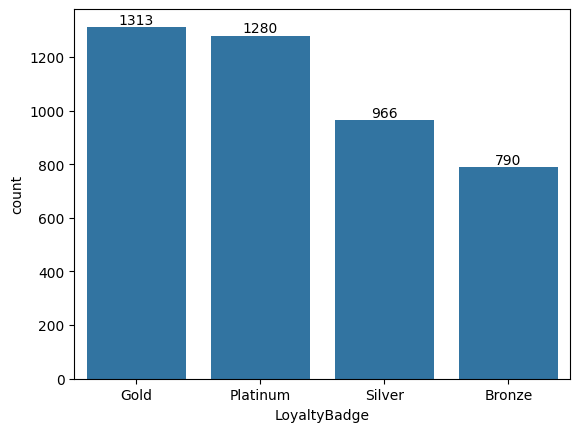

In [35]:
# Distribution of customers
ax = sns.countplot(x = segmented_data['LoyaltyBadge']
                   , order = segmented_data['LoyaltyBadge'].value_counts().index)

ax.bar_label(ax.containers[0])
plt.show()

In [37]:
# exporting the segmented data as csv for further usecases
segmented_data.to_csv('/content/segmented_dataRFM.csv')